## Linear Regression with Batch, Mini-Batch and Stochastic Gradient Descent from Scratch using mtcars dataset.

#### Loading Dataset and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("/content/mtcars.csv")

In [3]:
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


##### Plotting Scatter-plot to visualize correlation between weight and mpg.

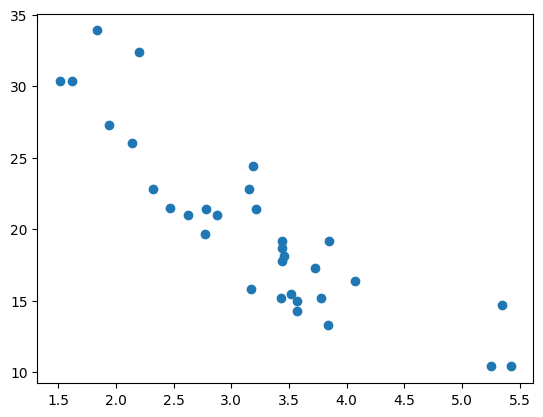

In [4]:
plt.scatter(df['wt'].to_numpy(),df['mpg'].to_numpy())

##### Helper Functions for myFnLinReg(x,y)

In [5]:
def data_iterator(features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    yield features, labels

def linreg(X, w, b):
    return np.dot(X, w) + b

def sgd(w, b, lr,l1,X):
    batch_size = len(X)
    b = b - lr * np.sum(l1) / batch_size
    w = w - lr * np.dot(X.T,l1) / batch_size
    return w,b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))

#### Main code for myFnLinReg(x,y)

We have implemented Batch Gradient Descent

In [6]:
lr = 0.1 #learning rate for gradient descent
num_epochs = 500 #no of epochs for which we will train

def myFnLinReg(X_1, y_1):
    cost_func_graph = []
    w = np.random.normal(0, 0.01, (1, 1))
    b = np.zeros(1)
    for epoch in range(num_epochs):
        for X, y in data_iterator(X_1, y_1):
            l = squared_loss(linreg(X, w, b), y)
            l1 = loss(linreg(X, w, b), y)
            l2 = np.sum(l1)
            w,b = sgd(w, b, lr,l1,X)
        cost_func_graph.append(float(squared_loss(linreg(X, w, b), y).mean()))
        if epoch%20 == 0:
            train_l = loss(linreg(X_1, w, b), y_1)
            train_l2 = squared_loss(linreg(X, w, b), y)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f},cost/loss-mse {float(train_l2.mean()):f}')
    arr = np.array(cost_func_graph)
    print(arr.shape)
    plt.plot(arr)
    plt.show()
    return w,b

Converting dataseries of dataset to numpy array for easier working for further questions

In [7]:
X_1 = df['wt'].to_numpy().reshape(-1,1)
y_1 = df['mpg'].to_numpy().reshape(-1,1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.20, random_state=42)

epoch 1, loss 0.222327,cost/loss-mse 61.113149
epoch 21, loss -2.348410,cost/loss-mse 42.236922
epoch 41, loss -2.007596,cost/loss-mse 31.913503
epoch 61, loss -1.716243,cost/loss-mse 24.369034
epoch 81, loss -1.467173,cost/loss-mse 18.855455
epoch 101, loss -1.254250,cost/loss-mse 14.826070
epoch 121, loss -1.072226,cost/loss-mse 11.881351
epoch 141, loss -0.916619,cost/loss-mse 9.729319
epoch 161, loss -0.783595,cost/loss-mse 8.156590
epoch 181, loss -0.669875,cost/loss-mse 7.007222
epoch 201, loss -0.572660,cost/loss-mse 6.167252
epoch 221, loss -0.489552,cost/loss-mse 5.553393
epoch 241, loss -0.418506,cost/loss-mse 5.104777
epoch 261, loss -0.357770,cost/loss-mse 4.776924
epoch 281, loss -0.305849,cost/loss-mse 4.537326
epoch 301, loss -0.261462,cost/loss-mse 4.362224
epoch 321, loss -0.223518,cost/loss-mse 4.234259
epoch 341, loss -0.191080,cost/loss-mse 4.140740
epoch 361, loss -0.163349,cost/loss-mse 4.072395
epoch 381, loss -0.139643,cost/loss-mse 4.022448
epoch 401, loss -0.1

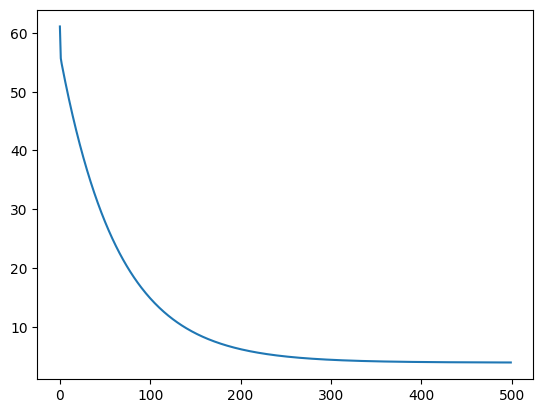

In [9]:
w1,b1 = myFnLinReg(X_train, y_train)

### Q3. What is the mpg of a car, whose weight is 5.5?

In [10]:
y_q3 = (5.5)*(w1) + b1
print(y_q3)

[[8.01584098]]


### Q4. Compute and print accuracy measures such as RMSE and R2 for the test set

In [11]:
def rmse(y_pred,y_hat):
    m = y_pred.shape[0]
    diff = np.sum((y_pred - y_hat)**2)
    loss = (1/m)*((diff))**0.5
    return loss
def r2_score(y_pred,y_hat):
    ssr = np.sum((y_pred - y_hat)**2)
    mean = np.mean(y_hat)
    sst = np.sum((y_hat - mean)**2)
    score = 1- ssr/sst
    return score

In [12]:
y_pred = X_test*(w1) + b1

In [13]:
r2_score(y_pred,y_test)

np.float64(0.683783345502883)

In [14]:
rmse(y_pred,y_test)

np.float64(1.3439617621589202)

### Q5. Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.

##### Helper Functions for myFnLinReg(x,y)

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

def linreg(X, w, b):
    return np.dot(X, w) + b
def sgd(w, b, lr, batch_size,l1,X):
    b = b - lr * np.sum(l1) / batch_size
    w = w - lr * np.dot(X.T,l1) / batch_size
    return w,b
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
def loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))

#### Main code for myFnLinReg(X,y,batch_size) which can be used for stochastic gradient descent and mini batch gradient descent.

In [16]:
def myFnLinReg2(X,y,batch_size):
    cost_func_graph = []
    w = np.random.normal(0, 0.01, (1, 1))
    b = np.zeros(1)
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, X_1, y_1):
            l = squared_loss(linreg(X, w, b), y)
            l1 = loss(linreg(X, w, b), y)
            l2 = np.sum(l1)
            w,b = sgd(w, b, lr, batch_size,l1,X)
        cost_func_graph.append(float(squared_loss(linreg(X, w, b), y).mean()))
        if epoch%20 == 0:
            train_l = loss(linreg(X_1, w, b), y_1)
            train_l2 = squared_loss(linreg(X, w, b), y)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f},cost/loss-mse {float(train_l2.mean()):f}')
    arr = np.array(cost_func_graph)
    print(arr.shape)
    plt.plot(arr)
    plt.show()
    return w,b

### Mini batch gradient descent

epoch 1, loss -14.363422,cost/loss-mse 88.427819
epoch 21, loss -2.352642,cost/loss-mse 18.535409
epoch 41, loss -0.651847,cost/loss-mse 6.399563
epoch 61, loss -2.494843,cost/loss-mse 3.632381
epoch 81, loss -2.041382,cost/loss-mse 2.321110
epoch 101, loss 0.590727,cost/loss-mse 7.956202
epoch 121, loss -0.525910,cost/loss-mse 3.875123
epoch 141, loss -0.677651,cost/loss-mse 3.115658
(150,)


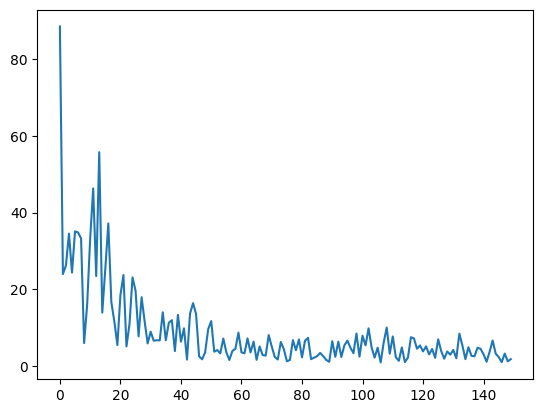

In [17]:
lr = 0.1 #learning rate
num_epochs = 150 #no of epochs
batch_size = 8 #batch size
w1,b1 = myFnLinReg2(X_train, y_train,batch_size)

In [18]:
y_pred = X_test*(w1) + b1

In [19]:
r2_score(y_pred,y_test)

np.float64(0.6510587559873676)

In [20]:
rmse(y_pred,y_test)

np.float64(1.4117919305215623)

### Stochastic batch gradient descent

epoch 1, loss -3.975329,cost/loss-mse 37.104786
epoch 21, loss -2.439256,cost/loss-mse 6.639866
epoch 41, loss -0.495582,cost/loss-mse 1.762247
epoch 61, loss -0.957174,cost/loss-mse 6.066414
epoch 81, loss -0.237614,cost/loss-mse 7.528512
epoch 101, loss -1.212810,cost/loss-mse 0.119670
epoch 121, loss 0.312090,cost/loss-mse 3.097150
epoch 141, loss -0.136921,cost/loss-mse 2.524799
epoch 161, loss -0.805015,cost/loss-mse 2.878774
epoch 181, loss -0.523886,cost/loss-mse 3.001833
epoch 201, loss -0.030623,cost/loss-mse 0.232163
epoch 221, loss -0.005359,cost/loss-mse 4.473506
epoch 241, loss -0.993469,cost/loss-mse 1.565317
epoch 261, loss -0.224067,cost/loss-mse 1.732118
epoch 281, loss 0.803431,cost/loss-mse 0.228172
epoch 301, loss -0.366738,cost/loss-mse 2.630454
epoch 321, loss -0.428153,cost/loss-mse 22.641671
epoch 341, loss 0.100739,cost/loss-mse 0.016892
epoch 361, loss 0.610415,cost/loss-mse 0.063738
epoch 381, loss -0.162849,cost/loss-mse 0.383569
epoch 401, loss 0.519235,cos

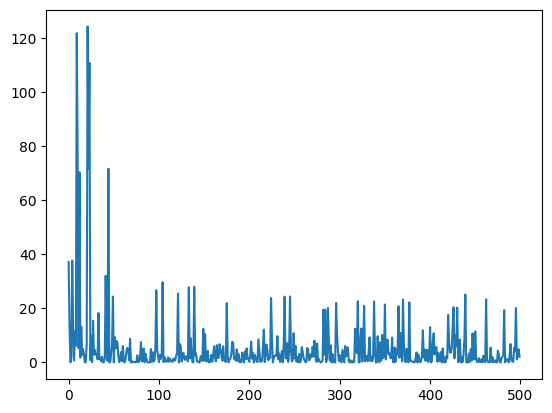

In [21]:
lr = 0.01
num_epochs = 500
w1,b1 = myFnLinReg2(X_train, y_train,1)

In [22]:
y_pred = X_test*(w1) + b1

In [23]:
r2_score(y_pred,y_test)

np.float64(0.6574910663513459)

In [24]:
rmse(y_pred,y_test)

np.float64(1.3987190651715555)

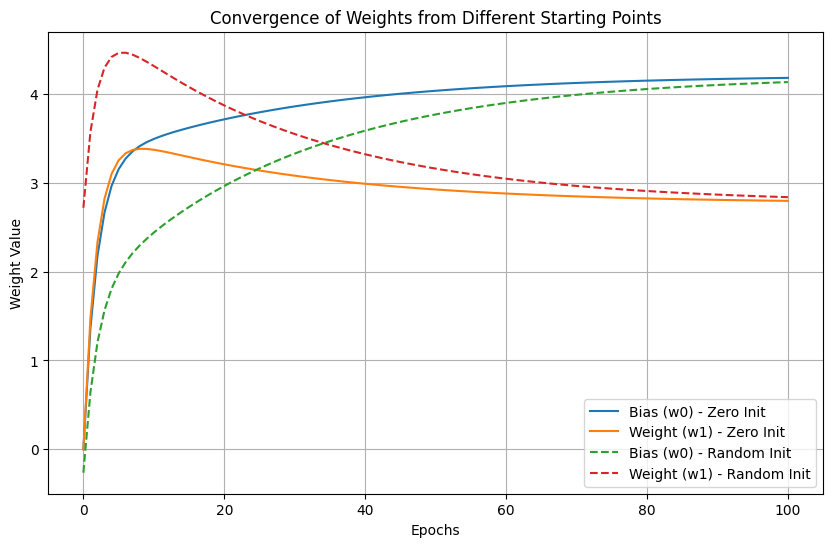

In [26]:
def batch_gradient_descent_track_weights(X, y, lr=0.1, epochs=100, init="zeros"):
    m, n = X.shape
    if init == "zeros":
        weights = np.zeros(n)
    elif init == "random":
        weights = np.random.randn(n)

    weight_history = [weights.copy()]

    for epoch in range(epochs):
        y_pred = predict(X, weights)
        gradient = (2/m) * np.dot(X.T, (y_pred - y))
        weights -= lr * gradient
        weight_history.append(weights.copy())

    return np.array(weight_history)

# Track both initializations
weights_zero_init = batch_gradient_descent_track_weights(X_b, y, lr=0.1, epochs=100, init="zeros")
weights_rand_init = batch_gradient_descent_track_weights(X_b, y, lr=0.1, epochs=100, init="random")

# Plot weight trajectories
plt.figure(figsize=(10,6))
plt.plot(weights_zero_init[:,0], label="Bias (w0) - Zero Init", linestyle="solid")
plt.plot(weights_zero_init[:,1], label="Weight (w1) - Zero Init", linestyle="solid")

plt.plot(weights_rand_init[:,0], label="Bias (w0) - Random Init", linestyle="dashed")
plt.plot(weights_rand_init[:,1], label="Weight (w1) - Random Init", linestyle="dashed")

plt.xlabel("Epochs")
plt.ylabel("Weight Value")
plt.title("Convergence of Weights from Different Starting Points")
plt.legend()
plt.grid(True)
plt.show()
